# <center>Boston Crime Dataset</center>

# About Dataset : <br>
<b>Crime incident reports are provided by Boston Police Department (BPD) to document the initial details surrounding an incident to which BPD officers respond. This is a dataset containing records from the new crime incident report system, which includes a reduced set of fields focused on capturing the type of incident as well as when and where it occurred. Records in the new system begin in June of 2015.</b>



# Objectives : <br>

<h4>To answer below questions by Visualization & Modelling of Dataset with different variables: <br><br>
1.	 How has crime changed over the years?<br><br>
2.   Which are the Most Safe and Unsafe Streets in Boston between the period of 2015 - 2018 ?    <br><br>
3.	 Is it possible to predict where or when a crime will be committed?</h4>

<h3>Challenges :</h3> <br>
<b>
1. Since dataset has mostly all the categorical variables, to use these variables for fitting the data in models we have to convert all these variables in Numeric values.<br><br>
2. Same streets have been entered with slightly different names , we had to parse them into one unique street<br><br>

# Contents <br>
<b>
1. Importing Dataset <br>
2. Data Visualzation <br>
3. Modelling of Data <br>
4. Clustering <br>
5. Conclusion<br>

# Importing Dataset

In [374]:
# Importing pandas and numpy libraries dataset
import pandas as pd
import numpy as np

# Read csv file into a pandas dataframe.
crime = pd.read_csv('C:/crime.csv',encoding = 'unicode_escape')

# Using set_option(),changing the default number of rows and columns to be displayed.
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Taking a look at the first few rows of the dataset.
crime.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [375]:
crime.columns            # Printing all the column names of the dataset

Index(['INCIDENT_NUMBER', 'OFFENSE_CODE', 'OFFENSE_CODE_GROUP',
       'OFFENSE_DESCRIPTION', 'DISTRICT', 'REPORTING_AREA', 'SHOOTING',
       'OCCURRED_ON_DATE', 'YEAR', 'MONTH', 'DAY_OF_WEEK', 'HOUR', 'UCR_PART',
       'STREET', 'Lat', 'Long', 'Location'],
      dtype='object')

# Data Cleaning Process:

<h3>Here in this step we clean dataset by removing the NA values , Removing the duplicates and renaming the columns with appropriate format.</h3>

In [376]:
crime.isnull().sum()      # sum of the missing values in each column

INCIDENT_NUMBER             0
OFFENSE_CODE                0
OFFENSE_CODE_GROUP          0
OFFENSE_DESCRIPTION         0
DISTRICT                 1774
REPORTING_AREA              0
SHOOTING               326765
OCCURRED_ON_DATE            0
YEAR                        0
MONTH                       0
DAY_OF_WEEK                 0
HOUR                        0
UCR_PART                   93
STREET                  10977
Lat                     20632
Long                    20632
Location                    0
dtype: int64

In [377]:
# Removing the columns which are insignificant
for column in crime:
    if(crime[column].count() < 100000):
        crime.drop([column], axis = 1, inplace = True)
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [378]:
crime.isnull().sum()

INCIDENT_NUMBER            0
OFFENSE_CODE               0
OFFENSE_CODE_GROUP         0
OFFENSE_DESCRIPTION        0
DISTRICT                1774
REPORTING_AREA             0
OCCURRED_ON_DATE           0
YEAR                       0
MONTH                      0
DAY_OF_WEEK                0
HOUR                       0
UCR_PART                  93
STREET                 10977
Lat                    20632
Long                   20632
Location                   0
dtype: int64

In [379]:
# Filling the columns with fillna method
crime.fillna({
   'UCR_PART': 'N/A', 
    'DISTRICT': 'N/A', 
    'STREET': 'N/A', 
    'Lat' : 'N/A',
    'Long' : 'N/A'
}, inplace= True)
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.2626,-71.1212,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.3521,-71.1353,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.3081,-71.0769,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.3595,-71.0596,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.3753,-71.0247,"(42.37525782, -71.02466343)"


In [380]:
# Deleting 'REPORTING_AREA' variable as it is insignificant for the data analysis.
del crime['REPORTING_AREA']
crime.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.2626,-71.1212,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.3521,-71.1353,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.3081,-71.0769,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.3595,-71.0596,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.3753,-71.0247,"(42.37525782, -71.02466343)"


In [381]:
crime.isnull().sum()

INCIDENT_NUMBER        0
OFFENSE_CODE           0
OFFENSE_CODE_GROUP     0
OFFENSE_DESCRIPTION    0
DISTRICT               0
OCCURRED_ON_DATE       0
YEAR                   0
MONTH                  0
DAY_OF_WEEK            0
HOUR                   0
UCR_PART               0
STREET                 0
Lat                    0
Long                   0
Location               0
dtype: int64

The above output shows that all the Null values have been taken care of.

In [382]:
#  Specifying 'INCIDENT_NUMBER' column to use as index.
crime.set_index('INCIDENT_NUMBER', inplace = True)
crime.head()

,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
INCIDENT_NUMBER,,,,,,,,,,,,,,
I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.2626,-71.1212,"(42.26260773, -71.12118637)"
I182080053,3201,Property Lost,PROPERTY - LOST,D14,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.3521,-71.1353,"(42.35211146, -71.13531147)"
I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.3081,-71.0769,"(42.30812619, -71.07692974)"
I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.3595,-71.0596,"(42.35945371, -71.05964817)"
I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.3753,-71.0247,"(42.37525782, -71.02466343)"


In [383]:
# Renaming few column names 
crime.rename(columns={'INCIDENT_NUMBER': 'Incident_Number', 'OFFENSE_CODE': 'Offense_Code', 'OFFENSE_CODE_GROUP':'Offense_Code_Group', 'OFFENSE_DESCRIPTION': 'Offense_Description', 'DISTRICT': 'District', 'OCCURRED_ON_DATE':'Occured_on_Date', 'YEAR': 'Year', 'MONTH':'Month', 'DAY_OF_WEEK':'Day_of_Week', 'HOUR':'Hour', 'STREET':'Street'}, inplace=True)
crime.head()

,Offense_Code,Offense_Code_Group,Offense_Description,District,Occured_on_Date,Year,Month,Day_of_Week,Hour,UCR_PART,Street,Lat,Long,Location
INCIDENT_NUMBER,,,,,,,,,,,,,,
I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.2626,-71.1212,"(42.26260773, -71.12118637)"
I182080053,3201,Property Lost,PROPERTY - LOST,D14,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.3521,-71.1353,"(42.35211146, -71.13531147)"
I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.3081,-71.0769,"(42.30812619, -71.07692974)"
I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.3595,-71.0596,"(42.35945371, -71.05964817)"
I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.3753,-71.0247,"(42.37525782, -71.02466343)"


In [384]:
# Checking for Duplicate Values
crime.duplicated().sum()

954

In [385]:
# Removing all the Duplicate Values from the dataset.
crime.drop_duplicates(keep=False, inplace=True)
crime.head()

,Offense_Code,Offense_Code_Group,Offense_Description,District,Occured_on_Date,Year,Month,Day_of_Week,Hour,UCR_PART,Street,Lat,Long,Location
INCIDENT_NUMBER,,,,,,,,,,,,,,
I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.2626,-71.1212,"(42.26260773, -71.12118637)"
I182080053,3201,Property Lost,PROPERTY - LOST,D14,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.3521,-71.1353,"(42.35211146, -71.13531147)"
I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.3081,-71.0769,"(42.30812619, -71.07692974)"
I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.3595,-71.0596,"(42.35945371, -71.05964817)"
I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.3753,-71.0247,"(42.37525782, -71.02466343)"


In [386]:
crime.duplicated().sum()

0

 <b>Now that the Data is cleaned, We can perform Data Visualization process to answer all the important questions. </b>

# Data Visualization Process :
<br>
<b>Here in this step, we are visualizing particular attributes to answer the questions . we have divided the crimes into years, months, days, weeks and Day and Night to observe the crime rate accordingly.<br><br>
Also, we visualized the streets according to crime rates to find the safest and insecure streets of Boston

In [387]:
# Importing datetime, matplotlib and seaborn libraries.
import os
import csv
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib import cm
import seaborn as sns

In [388]:
#Functions for visulization.

def create_list_number_crime(name_column, list_unique):
    # list_unique = df[name_column].unique()
    
    i = 0
    
    list_number = list()
    
    while i < len(list_unique):
        list_number.append(len(crime.loc[crime[name_column] == list_unique[i]]))
        i += 1
    
    return list_unique, list_number

In [389]:
# pie_plot def  function
def pie_plot(list_number, list_unique):
    plt.figure(figsize=(20,10))
    plt.pie(list_unique, 
        labels=list_number,
        autopct='%1.1f%%', 
        shadow=True, 
        startangle=140)
 
    plt.axis('equal')
    plt.show()
    return 0

In [390]:
# bar_code
def bar_chart(list_number, list_unique):
    objects = list_unique
    y_pos = np.arange(len(objects))
    performance = list_number
 
    plt.figure(figsize=(20,10))    
    plt.bar(y_pos, performance, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('Number') 
    plt.show()
    
    return 0


##  Q. How the Crime has Changed Over Years ? 


### A. Total number of crime for each year using Pie Graph

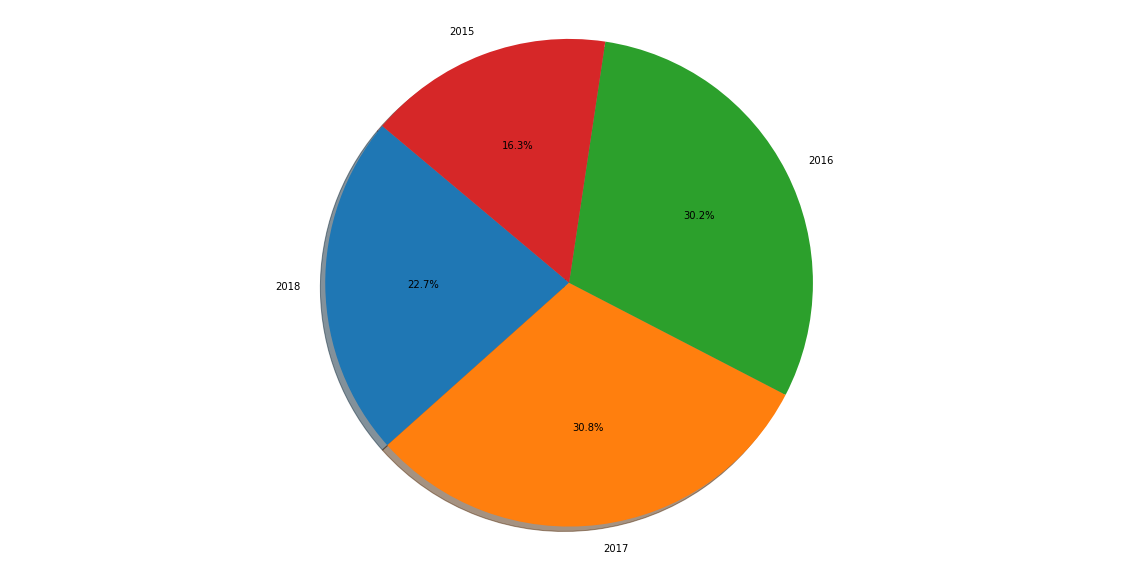

0

In [391]:
list_unique_year, list_number_year = create_list_number_crime('Year',crime['Year'].unique())

pie_plot(list_unique_year, list_number_year)


### Total number of crime for each year using Bar Plot.

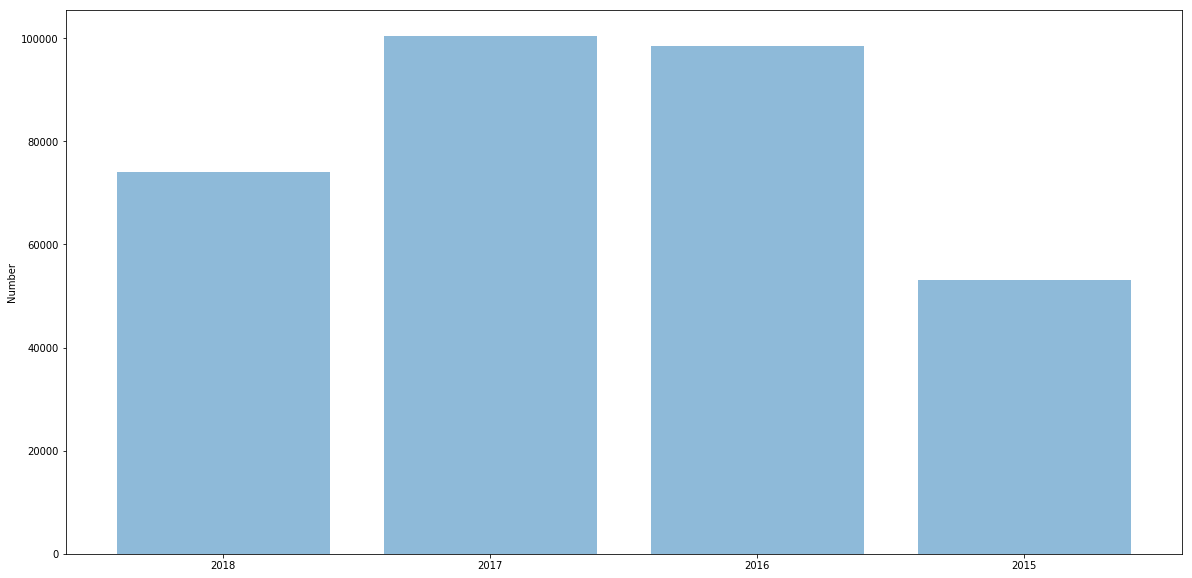

0

In [392]:
bar_chart(list_number_year,list_unique_year)


### <b>After analyzing the Pie and Bar charts of crime committed each year, we can conclude that crime has occured most in the year 2017. In the year 2018, crimes in Boston has decreased by a good margin which indicates a positive sign. 


### B. Total number of Crime: Month Wise

In [393]:
list_unique_month, list_number_month = create_list_number_crime('Month',list(range(1,13)))

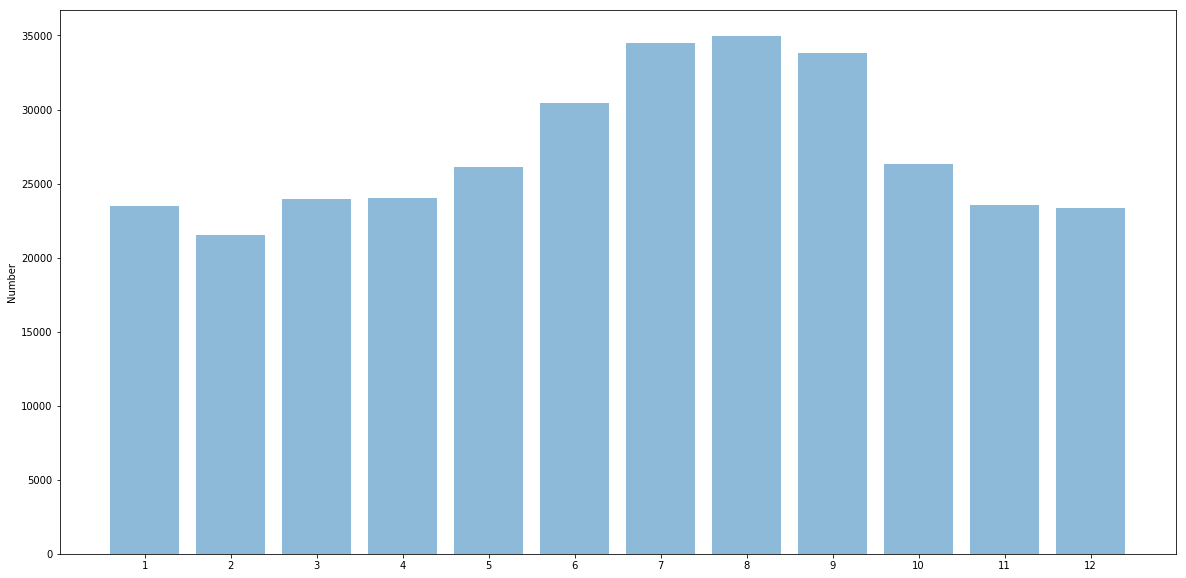

0

In [394]:
bar_chart(list_number_month,list_unique_month)


### <b>After observing the above bar plot of crimes occuring month wise, we can conclude that the most number of crimes have occured in the month of 'August'. 

## C. Total number of crime for each day of week

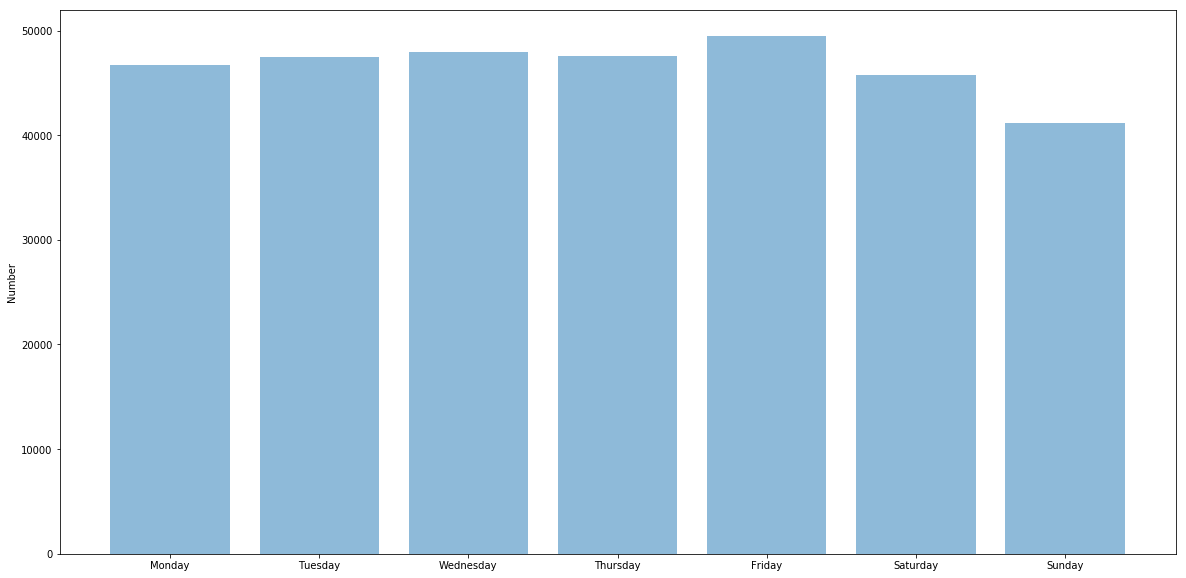

0

In [395]:
#5.4. Total number crime for each day of week

day_of_week = ('Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday')

list_unique_day, list_number_day = create_list_number_crime('Day_of_Week',day_of_week)

#pie_plot(list_unique_day,list_number_day)

bar_chart(list_number_day,list_unique_day)

### <b>The above bar plot shows that crimes occur most on Friday. 

## D. Total number of crime for each hour

In [396]:

list_unique_hour, list_number_hour = create_list_number_crime('Hour',list(range(0,24)))


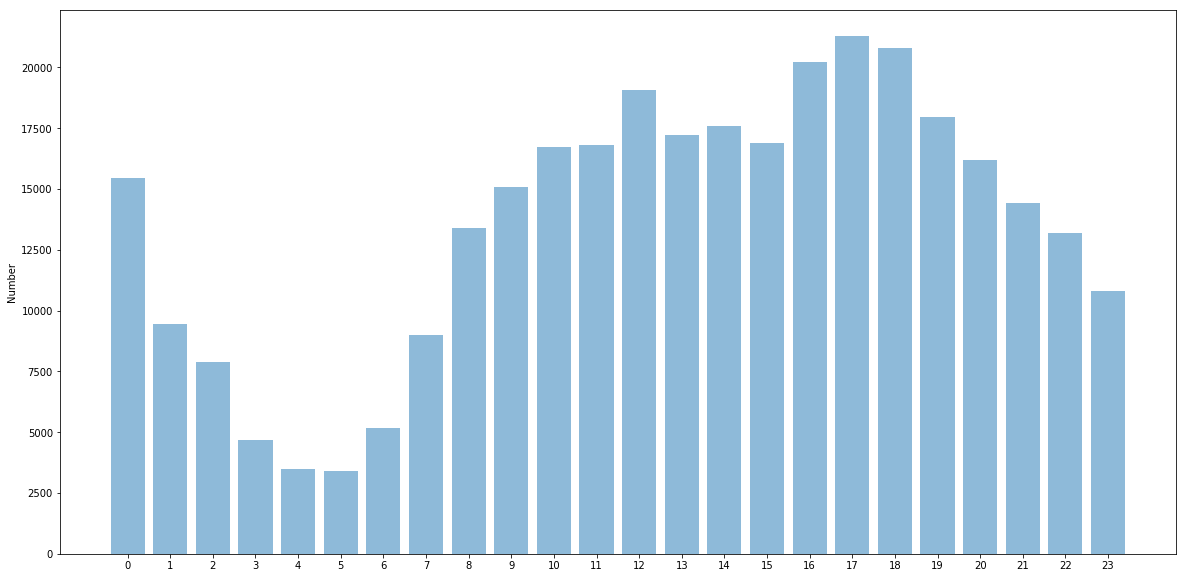

0

In [397]:
bar_chart(list_number_hour,list_unique_hour)


### <b>We can clearly observe that most of the crimes have occured in the 17th hour of the day followed by 18th which means Evening Time is clearly a bit unsafe.

## Q. Which are the Most Safe & Unsafe Streets in Boston during the period of 2015 - 2018 ?

### E. Bar plot of crimes commited on the streets of Boston
### a. in the year 2015:

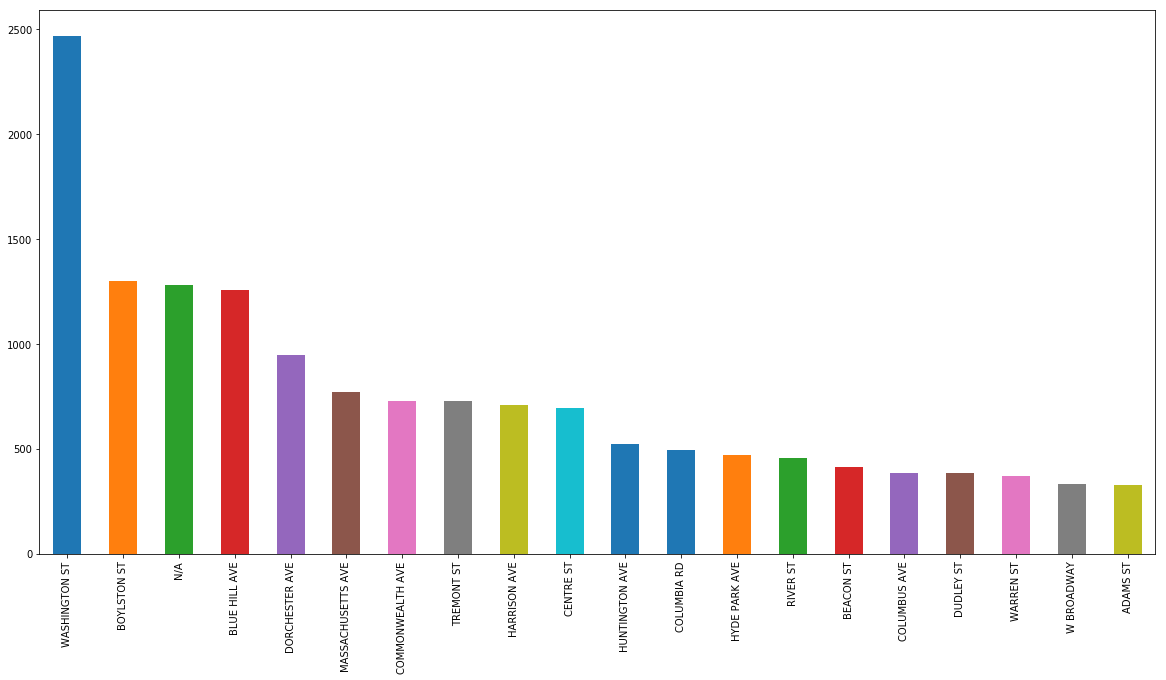

In [398]:
plt.figure(figsize=(20,10))
crime['Street'].loc[crime['Year']==2015].value_counts()[:20].plot.bar()
plt.show()

## Bar plot of crimes commited on the streets of Boston
## b. in the year 2016:

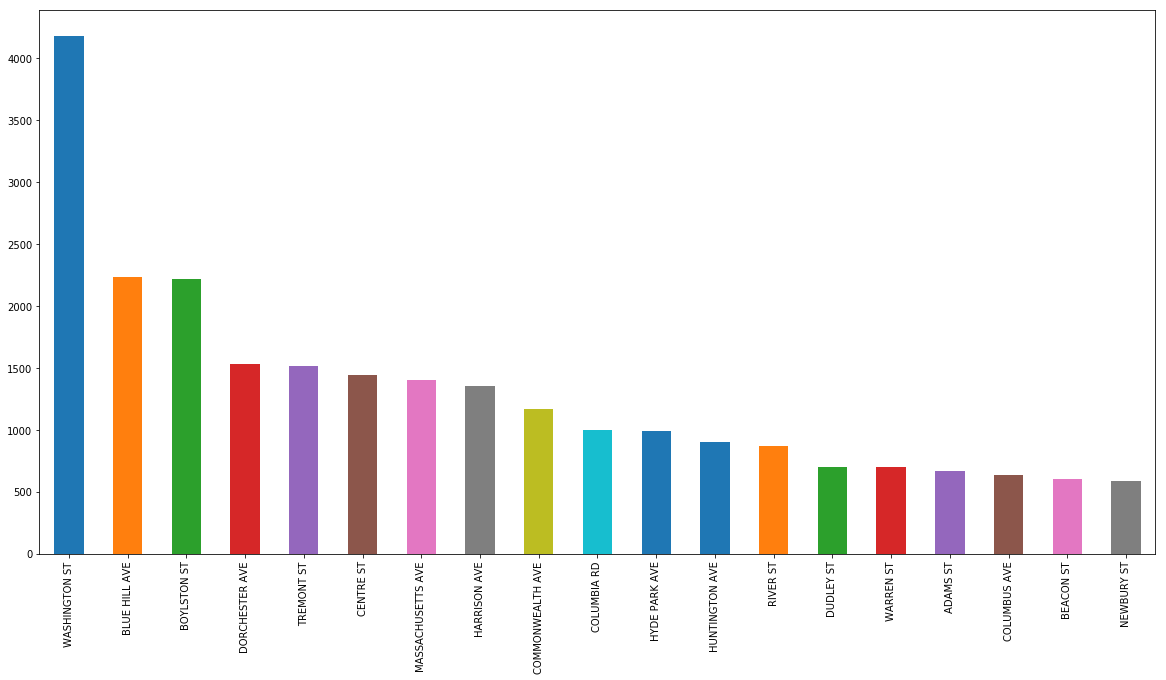

In [399]:
plt.figure(figsize=(20,10))
crime['Street'].loc[crime['Year']==2016].value_counts()[1:20].plot.bar()
plt.show()

## Bar plot of crimes commited on the streets of Boston
## c. in the year 2017:

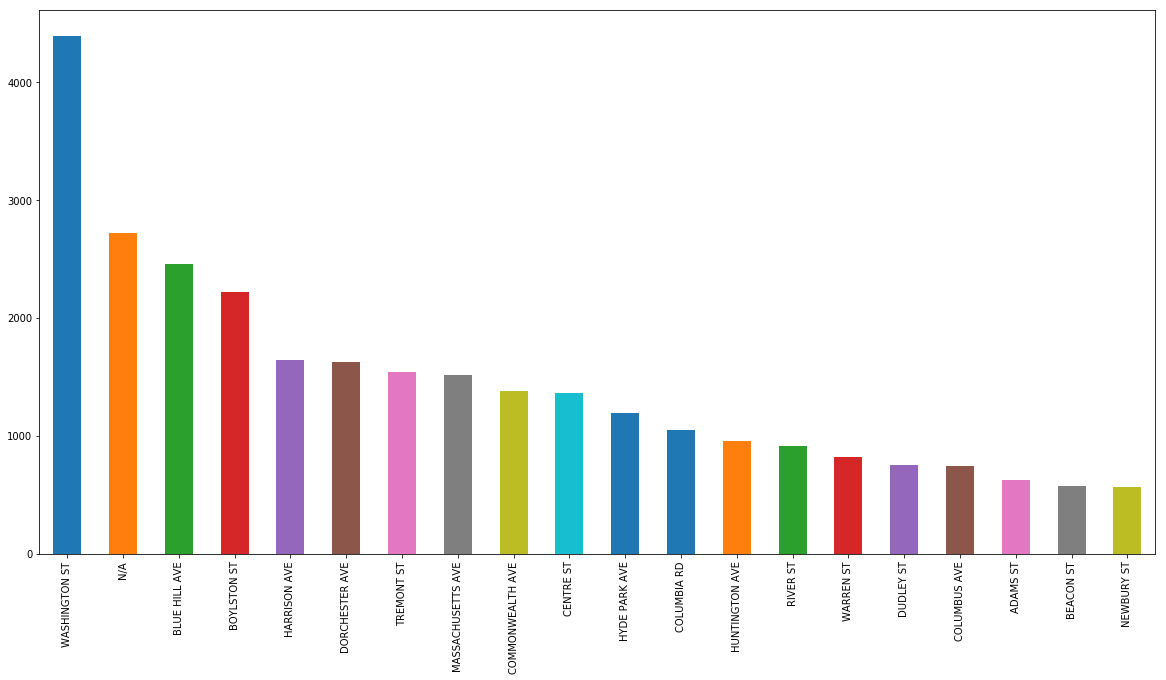

In [400]:
plt.figure(figsize=(20,10))
crime['Street'].loc[crime['Year']==2017].value_counts()[:20].plot.bar()
plt.show()

## Bar plot of crimes committed on the streets of Boston
## d. in the year 2018:

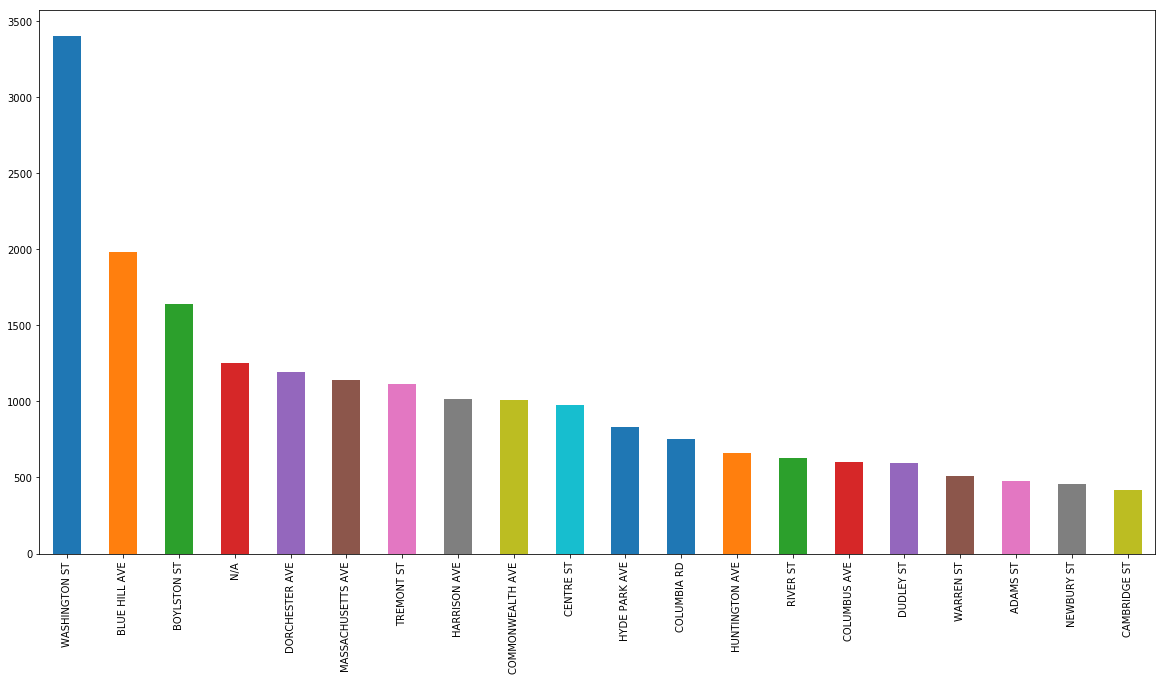

In [401]:
plt.figure(figsize=(20,10))
crime['Street'].loc[crime['Year']==2018].value_counts()[:20].plot.bar()
plt.show()

### <b>  After observing the bar plot of crimes committed on the streets of Boston in all the four years (2015-2018), it <br><br>can be observed that 'Washington St' is the street where maximum number of crimes has occured every year  <br><br>  and  the Safest streest in Boston are "ADAMS ST" , "NEWBURY ST" , "CAMBRIDGE ST". 

## <b> F. Bar plot of crimes occuring at Day or Night: 

In [402]:
# Creating New Variable: Day
crime['Day'] = 0

In [403]:
# Creating New Variable: Night
crime['Night'] = 0

In [404]:
# Day or night for 1st month
crime['Day'].loc[(crime['Month'] == 1) & (crime['Hour'] >= 6) & (crime['Hour'] <= 18)] = 1

# Day or night for 2nd month
crime['Day'].loc[(crime['Month'] == 2) & (crime['Hour'] >= 6) & (crime['Hour'] <= 18)] = 1

# Day or night for 3rd month
crime['Day'].loc[(crime['Month'] == 3) & (crime['Hour'] >= 6) & (crime['Hour'] <= 18)] = 1

# Day or night for 4th month
crime['Day'].loc[(crime['Month'] == 4) & (crime['Hour'] >= 6) & (crime['Hour'] <= 18)] = 1

# Day or night for 5th month
crime['Day'].loc[(crime['Month'] == 5) & (crime['Hour'] >= 6) & (crime['Hour'] <= 18)] = 1

# Day or night for 6th month
crime['Day'].loc[(crime['Month'] == 6) & (crime['Hour'] >= 6) & (crime['Hour'] <= 18)] = 1

# Day or night for 7th month
crime['Day'].loc[(crime['Month'] == 7) & (crime['Hour'] >= 6) & (crime['Hour'] <= 18)] = 1

# Day or night for 8th month
crime['Day'].loc[(crime['Month'] == 8) & (crime['Hour'] >= 6) & (crime['Hour'] <= 18)] = 1

# Day or night for 9th month
crime['Day'].loc[(crime['Month'] == 9) & (crime['Hour'] >= 6) & (crime['Hour'] <= 18)] = 1

# Day or night for 10th month
crime['Day'].loc[(crime['Month'] == 10) & (crime['Hour'] >= 6) & (crime['Hour'] <= 18)] = 1

# Day or night for 11th month
crime['Day'].loc[(crime['Month'] == 11) & (crime['Hour'] >= 6) & (crime['Hour'] <= 18)] = 1

# Day or night for 12th month
crime['Day'].loc[(crime['Month'] == 12) & (crime['Hour'] >= 6) & (crime['Hour'] <= 18)] = 1

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [405]:
crime['Night'].loc[crime['Day']==0]=1


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


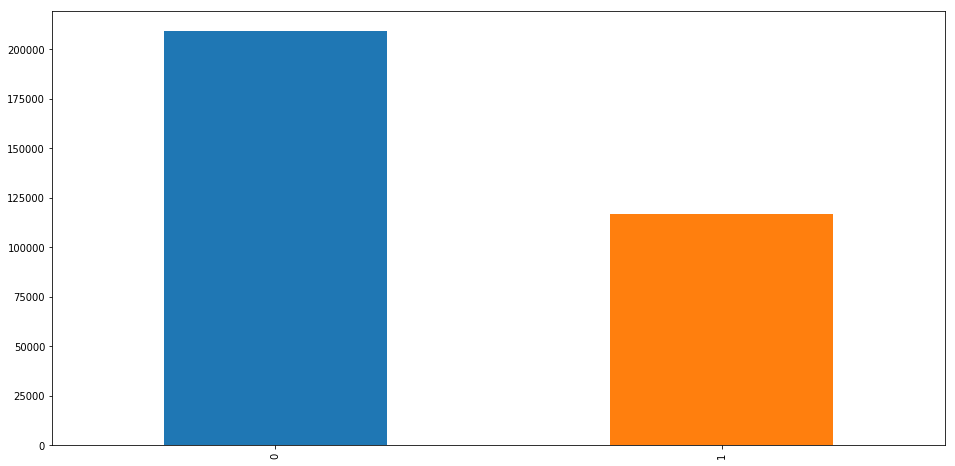

In [406]:
plt.figure(figsize=(16,8))
crime['Night'].value_counts().plot.bar()
plt.show()

### In the above Bar Plot, '0' : 'Night' and '1' : represents 'Day'. We can interpret that majority of the Crimes in Boston occur at night. 

# Modeling of Dataset

<b>In in step we consider two cases for predicting the crimes to answer question .
    
    Case 1 -> 
         we are predicting " Offence Code Group" based on other predictor variables like DISTRICT','MONTH','DAY_OF_WEEK',  'HOUR','Lat','Long', 'Offense_Code_Group','Day','Night'.
         
    Offence Code groups are 'Motor Vehicle Accident Response','Larceny','Medical Assistance', 'Investigate Person', 'Other', 'Drug Violation', 'Simple Assault','Vandalism', 'Verbal Disputes', 'Towed', 'Investigate Property' , 'Larceny From Motor Vehicle' ,'Property Lost' ,'Warrant Arrests' and 'Aggravated Assault'.
         
    Case 2 ->
           we are predicting " UCR_part " based on other predictor variables like DISTRICT','MONTH','DAY_OF_WEEK',  'HOUR','Lat','Long', 'Offense_Code_Group','Day','Night'.
           
    UCR_PART - The Uniform Crime Reports compiles official data on crime in the United States, published by the Federal Bureau of Investigation. There are different parts in the UCR where they have defined some similar crimes in different parts. 
         

In [407]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors.nearest_centroid import NearestCentroid
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import math
from sklearn.metrics import f1_score

##  Defining the functions for thr purpose of redundancy of code in two cases.
### Implementing Decision Tree Classifier, Kneighbors Classifier and Random Forest Classifier models.

In [408]:
#returns mean ma and min of F1_score 

def fun_results(result):
    print('mean: ' + str(result.mean()))
    print('max: ' + str(result.max()))
    print('min: ' + str(result.min()))

    return 

In [409]:
# DecisionTreeClassifier

def fun_DecisionTreeClassifier(X_train, Y_train):
    dec_tree = DecisionTreeClassifier()
    dec_tree = dec_tree.fit(X_train, Y_train)

    dec_tree_pred = dec_tree.predict(X_test)

    dec_tree_score = f1_score(Y_test, dec_tree_pred, average=None)
    accuracy = accuracy_score(Y_test, dec_tree_pred)
    # Determining Accuracy of the model
    print("Accuracy = " + str(math.ceil((accuracy*100))) + str("%"))
    return fun_results(dec_tree_score)


In [410]:
# KNeighborsClassifier

def fun_KNeighborsClassifier(X_train, Y_train):
    neigh = KNeighborsClassifier()
    neigh.fit(X_train, Y_train) 
    neigh_pred = neigh.predict(X_test)
    print(neigh_pred.shape)
    neigh_score = f1_score(Y_test, neigh_pred, average=None)
    accuracy = accuracy_score(Y_test, neigh_pred)
    # Determining Accuracy of the model.
    print("Accuracy = " + str(math.ceil((accuracy*100))) + str("%"))
    return fun_results(neigh_score)


In [411]:
# RandomForestClassifier

def fun_RandomForestClassifier(X_train, Y_train):
    rfc = RandomForestClassifier()
    rfc = rfc.fit(X_train, Y_train)

    rfc_pred = rfc.predict(X_test)

    rfc_score = f1_score(Y_test, rfc_pred, average=None)
    accuracy = accuracy_score(Y_test, rfc_pred)
    print("Accuracy = " + str(math.ceil((accuracy*100))) + str("%"))
    return fun_results(rfc_score)


<b>Modelling CASE 1 : 

X -> Offence Code Group <br><br>
Y -> 'DISTRICT','MONTH','DAY_OF_WEEK', 'HOUR','Lat','Long', 'Offense_Code_Group','Day','Night'

<b> summarizing the columns and converting categorical attributes to numerical values. 

In [412]:
crime['Offense_Code_Group'].value_counts().head(15)


Motor Vehicle Accident Response    38106
Larceny                            26552
Medical Assistance                 24099
Investigate Person                 19114
Other                              18542
Drug Violation                     16821
Simple Assault                     16239
Vandalism                          15692
Verbal Disputes                    13478
Towed                              11591
Investigate Property               11343
Larceny From Motor Vehicle         11073
Property Lost                      10067
Warrant Arrests                     8408
Aggravated Assault                  8000
Name: Offense_Code_Group, dtype: int64

In [413]:
# Creating a list for offense_code_group
list_offense_code_group = ('Motor Vehicle Accident Response',
                           'Larceny',
                           'Medical Assistance',
                           'Investigate Person',
                           'Other',
                           'Drug Violation',
                           'Simple Assault',
                           'Vandalism',
                           'Verbal Disputes',
                           'Towed',
                           'Investigate Property',
                           'Larceny From Motor Vehicle'
                           'Property Lost'
                           'Warrant Arrests'
                           'Aggravated Assault'
                          )

In [414]:
crime_model = pd.DataFrame()

In [415]:
i = 0

while i < len(list_offense_code_group):

    crime_model = crime_model.append(crime.loc[crime['Offense_Code_Group'] == list_offense_code_group[i]])
    
    i+=1


In [416]:
list_column = ['District','Month','Day_of_Week',
               'Hour','Lat','Long', 'Offense_Code_Group','Day','Night']

In [417]:
crime_model = crime_model[list_column]
crime_model.head()

,District,Month,Day_of_Week,Hour,Lat,Long,Offense_Code_Group,Day,Night
INCIDENT_NUMBER,,,,,,,,,
I182080048,N/A,10,Wednesday,20,42.3207,-71.0568,Motor Vehicle Accident Response,0,1
I182080043,D14,10,Wednesday,19,42.3443,-71.1578,Motor Vehicle Accident Response,0,1
I182080038,N/A,10,Wednesday,19,42.316,-71.0904,Motor Vehicle Accident Response,0,1
I182080030,C6,10,Tuesday,20,42.33,-71.0385,Motor Vehicle Accident Response,0,1
I182079979,C11,10,Wednesday,15,42.3109,-71.0577,Motor Vehicle Accident Response,1,0


First Converting all the categorical variables to Numeric for the purpose of fitting the models 

In [418]:
# DISTRICT

crime_model['District'] = crime_model['District'].map({
    'B3':1, 
    'E18':2, 
    'B2':3, 
    'E5':4, 
    'C6':5, 
    'D14':6, 
    'E13':7, 
    'C11':8, 
    'D4':9, 
    'A7':10, 
    'A1':11, 
    'A15':12
})

crime_model['District'].unique()

array([nan,  6.,  5.,  8.,  3.,  2., 11., 10.,  1.,  7.,  9.,  4., 12.])

In [419]:
# MONTH

crime_model['Month'].unique()

array([10,  9,  8,  5,  7,  6,  3,  4, 11, 12,  1,  2], dtype=int64)

In [420]:
# DAY_OF_WEEK

crime_model['Day_of_Week'] = crime_model['Day_of_Week'].map({
    'Tuesday':2, 
    'Saturday':6, 
    'Monday':1, 
    'Sunday':7, 
    'Thursday':4, 
    'Wednesday':3,
    'Friday':5
})

crime_model['Day_of_Week'].unique()

array([3, 2, 1, 7, 4, 5, 6], dtype=int64)

In [421]:
# HOUR

crime_model['Hour'].unique()

array([20, 19, 15, 16, 14,  9, 17, 11, 22,  8,  7,  0, 23, 21, 10, 18, 12,
        2,  6, 13,  5,  4,  3,  1], dtype=int64)

In [422]:
# Lat, Long

crime_model[['Lat', 'Long']].head()

,Lat,Long
INCIDENT_NUMBER,,
I182080048,42.3207,-71.0568
I182080043,42.3443,-71.1578
I182080038,42.316,-71.0904
I182080030,42.33,-71.0385
I182079979,42.3109,-71.0577


In [423]:
crime_model.fillna(0, inplace = True)


In [424]:

x = crime_model[['District','Month','Day_of_Week','Hour','Lat','Long','Day','Night']]

y = crime_model['Offense_Code_Group']

## Split data into Training set and Test set for further Model Prediction.

In [425]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y, 
    test_size = 0.1,
    random_state=42
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(190419, 8) (190419,)
(21158, 8) (21158,)


In [426]:
y.unique()


array(['Motor Vehicle Accident Response', 'Larceny', 'Medical Assistance',
       'Investigate Person', 'Other', 'Drug Violation', 'Simple Assault',
       'Vandalism', 'Verbal Disputes', 'Towed', 'Investigate Property'],
      dtype=object)

In [427]:
y = y.map({
    'Motor Vehicle Accident Response':1, 
    'Larceny':2, 
    'Medical Assistance':3,
    'Investigate Person':4, 
    'Other':5, 
    'Drug Violation':6, 
    'Simple Assault':7,
    'Vandalism':8, 
    'Verbal Disputes':9, 
    'Towed':10, 
    'Investigate Property':11,
    'Larceny From Motor Vehicle':12
})

In [428]:
#Replacing 'N/A' with None (NaN) for reproducing Output
Y_train = Y_train.replace('N/A', None)
X_test = X_test.replace('N/A', None)
Y_test = Y_test.replace('N/A', None)
X_train = X_train.replace('N/A', None)

X_train.isna().sum()
X_test.isna().sum()
Y_train.isna().sum()
Y_test.isna().sum()

0

In [429]:
Y_test.shape

(21158,)

### Applying the models to case 1

In [430]:
# Decision Tree Classifier
fun_DecisionTreeClassifier(X_train, Y_train)


Accuracy = 23%
mean: 0.20923196883059572
max: 0.4461069548351344
min: 0.10929299166409386


In [431]:
# K-Nearest Neighbour
fun_KNeighborsClassifier(X_train, Y_train)

(21158,)
Accuracy = 18%
mean: 0.1473104838361058
max: 0.27198443579766535
min: 0.06818181818181819


In [432]:
# Random Forest Classifier

fun_RandomForestClassifier(X_train, Y_train)


Accuracy = 23%
mean: 0.20292118295820308
max: 0.4354166666666667
min: 0.08823529411764704


### Results From Modelling Case 1 :
<h4>The Observed Accuracy of Decision Tree Classifier is 23% , KNN classifier is 18%, Random Forest Classifier is 23%.<br><br>
Here we can observe that all three models fails to predict the Offence Code group correctly.</h4>


### Modelling Case 2 ->   

#### Y - UCR_PART

#### X - DISTRICT, REPORTING_AREA, MONTH, DAY_OF_WEEK, HOUR, LATITUDE, LONGITUDE

First Converting all the categorical variables to Numeric for the purpose of fitting the models 

In [433]:
crime.columns

Index(['Offense_Code', 'Offense_Code_Group', 'Offense_Description', 'District',
       'Occured_on_Date', 'Year', 'Month', 'Day_of_Week', 'Hour', 'UCR_PART',
       'Street', 'Lat', 'Long', 'Location', 'Day', 'Night'],
      dtype='object')

In [434]:
df_model3 = crime[['District', 'Month','Day_of_Week','Hour','UCR_PART','Lat','Long']]

In [435]:
df_model3['District'] = df_model3['District'].map({
    'B3':1, 
    'E18':2, 
    'B2':3, 
    'E5':4, 
    'C6':5, 
    'D14':6, 
    'E13':7, 
    'C11':8, 
    'D4':9, 
    'A7':10, 
    'A1':11, 
    'A15':12
})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


In [436]:
# DAY_OF_WEEK

df_model3['Day_of_Week'] = df_model3['Day_of_Week'].map({
    'Tuesday':2, 
    'Saturday':6, 
    'Monday':1, 
    'Sunday':7, 
    'Thursday':4, 
    'Wednesday':3,
    'Friday':5
})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [437]:
df_model3['UCR_PART'].unique()


array(['Part Two', 'Part Three', 'Part One', 'N/A', 'Other'], dtype=object)

In [438]:
df_model3['UCR_PART'] = df_model3['UCR_PART'].map({
    'Part Three':3, 
    'Part One':1, 
    'Part Two':2, 
#    'Other':4
})

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [439]:
df_model3 = df_model3.dropna()
print(df_model3.shape)
df_model3.isnull().sum()

(322940, 7)


District       0
Month          0
Day_of_Week    0
Hour           0
UCR_PART       0
Lat            0
Long           0
dtype: int64

In [440]:
crime.columns

Index(['Offense_Code', 'Offense_Code_Group', 'Offense_Description', 'District',
       'Occured_on_Date', 'Year', 'Month', 'Day_of_Week', 'Hour', 'UCR_PART',
       'Street', 'Lat', 'Long', 'Location', 'Day', 'Night'],
      dtype='object')

#### Here we define the predictor variables 

In [441]:
x = df_model3[['District', 'Month','Day_of_Week','Hour','Lat','Long']]
y = df_model3['UCR_PART']

In [442]:
# Split dataframe into random train and test subsets

X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y, 
    test_size = 0.1,
    random_state=42
)

print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(290646, 6) (290646,)
(32294, 6) (32294,)


In [443]:
#Replacing 'N/A' with None (NaN) for reproducing Output
Y_train = Y_train.replace('N/A', None)
X_test = X_test.replace('N/A', None)
Y_test = Y_test.replace('N/A', None)
X_train = X_train.replace('N/A', None)

X_train.isna().sum()
X_test.isna().sum()
Y_train.isna().sum()
Y_test.isna().sum()

0

### Applying the Models to case 2

In [444]:
fun_DecisionTreeClassifier(X_train, Y_train)


Accuracy = 45%
mean: 0.4155180453550465
max: 0.5408380565475216
min: 0.3012227855651656


In [445]:
fun_KNeighborsClassifier(X_train, Y_train)


(32294,)
Accuracy = 43%
mean: 0.3872054316082794
max: 0.5303602277816879
min: 0.25887071891391544


In [446]:
fun_RandomForestClassifier(X_train, Y_train)


Accuracy = 49%
mean: 0.42584578040259063
max: 0.5958339488846212
min: 0.28533285866856534


### Results From Modelling Case 2 :
<h4>The Observed Accuracy of Decision Tree Classifier is 45% , KNN classifier is 43%, Random Forest Classifier is 49%.<br><br>
Here we can observe that Random Forest Classifier gives almost 50% accuracy in predicting the UCR Part crimes .</h4>


### Clustering: location


The major aim is to perform clustering analysis using algorithms like hClust,kMeans,mclust,CLARA,Agnes and provide inferences accordingly to segment crimes based on their rates in the various cities according to the distribution of population which may be used to detect the crimes. Cluster analysis can be used to identify areas where there are greater incidences of particular types of crime. By identifying these distinct areas or “hot spots” where a similar crime has happened over a period of time, it is possible to manage law enforcement resources more effectively.



In [447]:
crime['Lat']= crime['Lat'].replace('N/A', None)
crime['Long']= crime['Long'].replace('N/A', None)

pd.to_numeric(crime['Long'], errors='coerce')


location = crime[['Lat','Long']]


location = location.dropna()

In [448]:
location = location.loc[(location['Lat'] > 40) & (location['Long'] < -60)] 

location.head()

,Lat,Long
INCIDENT_NUMBER,,
I182080058,42.2626,-71.1212
I182080053,42.3521,-71.1353
I182080052,42.3081,-71.0769
I182080051,42.3595,-71.0596
I182080050,42.3753,-71.0247


In [449]:
import folium
from folium import plugins

m = folium.Map([42.348624, -71.062492], zoom_start=13)
m


The above map represents the Boston city.

### Below Figure is the plot of Latitude and Longitude of all the crimes that took place in Boston . 

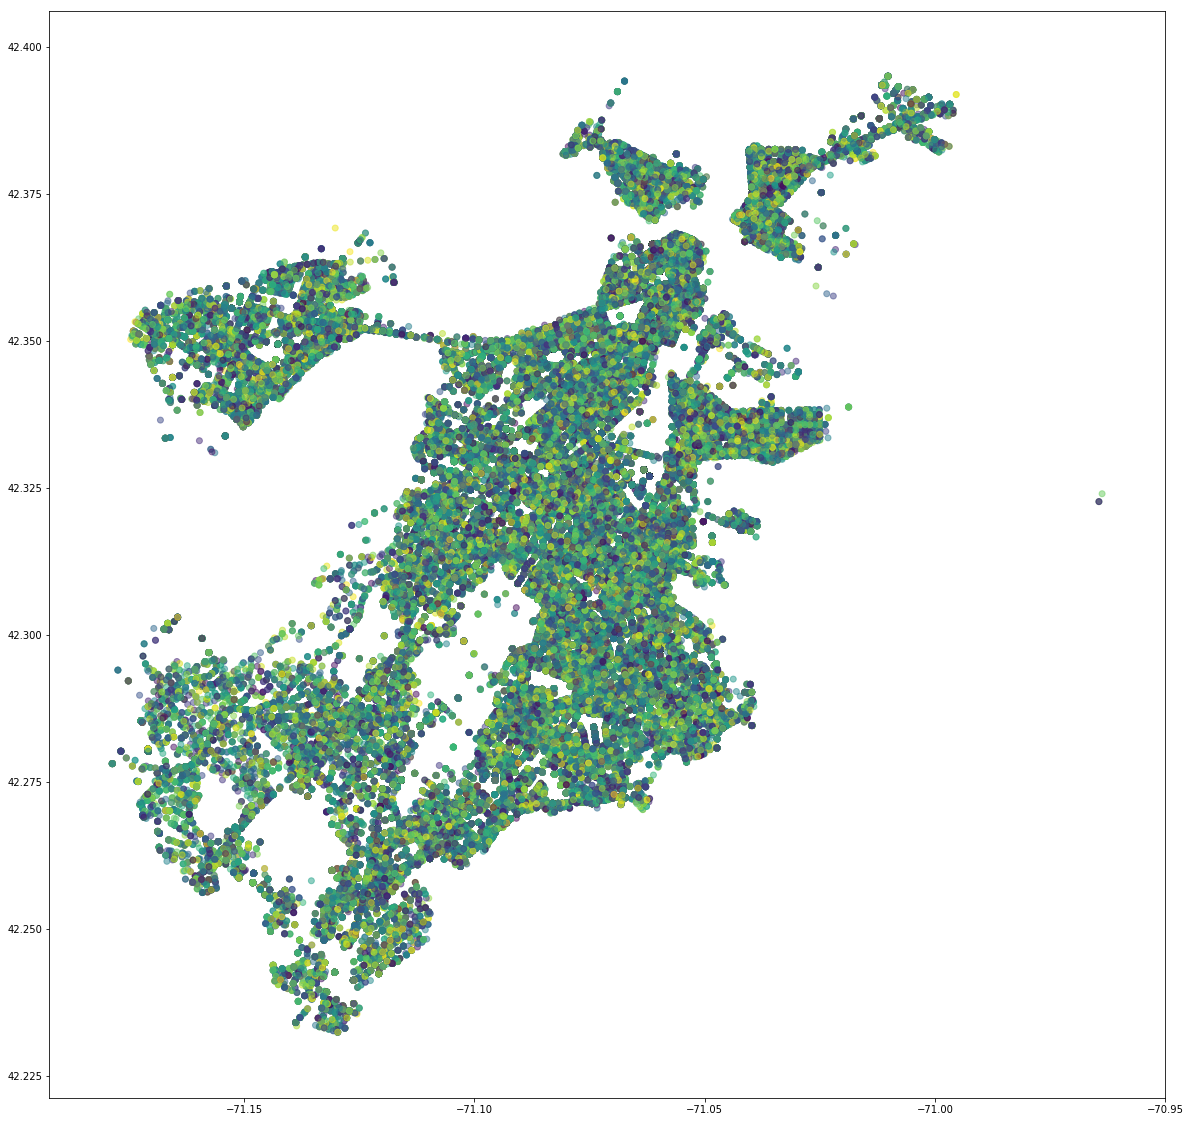

In [450]:
# plot of Lat and Long cordinates of crimes in Boston
x = location['Long']
y = location['Lat']


colors = np.random.rand(len(x))

plt.figure(figsize=(20,20))
plt.scatter(x, y,c=colors, alpha=0.5)
plt.show()

### Elbow Method
To select the optimum number of clusters for Kmeans we use Elbow Method and the steep elbow shape from the graph plot gives us the number of cluster for the K-means algorithm.

In [451]:
from sklearn.cluster import KMeans

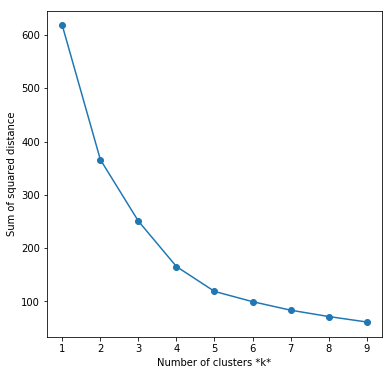

In [452]:
X = location
X = X[~X.isna()]

sse = []
list_k = list(range(1, 10))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

From the graph we can observe that 5 clusters will be optimum for the clustering .

### Clustering:
### KMeans
### 5 clusters

In [453]:
X = location
X = X[~X.isna()]

In [454]:
#K means Clustering #K means  
def doKmeans(X, nclust):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(X, 5)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

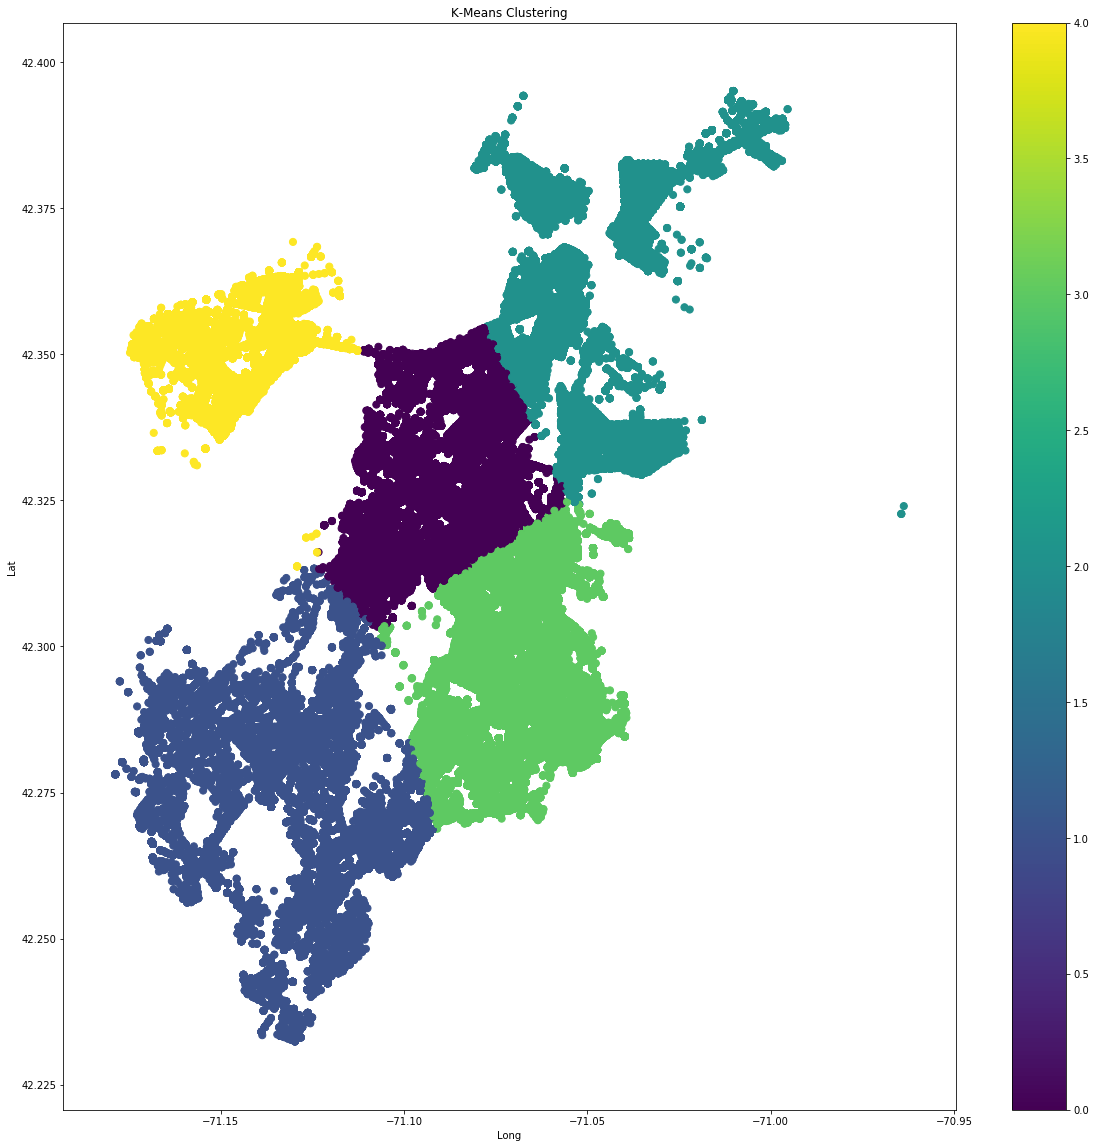

In [455]:
#Plot the clusters obtained using k means#Plot the 
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=50)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

### Interpretation of K-Means Clustering :
<b> Clustering gives us the minimum squared distance of each point from the nearest centroid, we have divided clusters into 5 parts. So we can say that if there are five safety stations at each centroid respectively then it will be easy for the emergency services to reach the crime scene for the reporting.

## Clustering with location and OFFENSE_CODE

In [456]:
crime.head()

,Offense_Code,Offense_Code_Group,Offense_Description,District,Occured_on_Date,Year,Month,Day_of_Week,Hour,UCR_PART,Street,Lat,Long,Location,Day,Night
INCIDENT_NUMBER,,,,,,,,,,,,,,,,
I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.2626,-71.1212,"(42.26260773, -71.12118637)",0,1
I182080053,3201,Property Lost,PROPERTY - LOST,D14,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.3521,-71.1353,"(42.35211146, -71.13531147)",0,1
I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.3081,-71.0769,"(42.30812619, -71.07692974)",0,1
I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.3595,-71.0596,"(42.35945371, -71.05964817)",0,1
I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.3753,-71.0247,"(42.37525782, -71.02466343)",0,1


In [457]:
df_clus = crime[['Offense_Code','Long','Lat']]

In [458]:
df_clus = df_clus.loc[(df_clus['Lat'] > 40) & (df_clus['Long'] < -60)]


In [459]:
df_clus = df_clus.dropna()


In [460]:
df_clus.describe()


,Offense_Code
count,325249.000000
mean,2317.543159
std,1185.849808
min,111.000000
25%,1001.000000
50%,2907.000000
75%,3201.000000
max,3831.000000


### 2 clusters


In [461]:
X = df_clus
X = X[~X.isna()]


In [462]:
clust_labels, cent = doKmeans(X, 2)
kmeans = pd.DataFrame(clust_labels)
X.insert((X.shape[1]),'kmeans',kmeans)

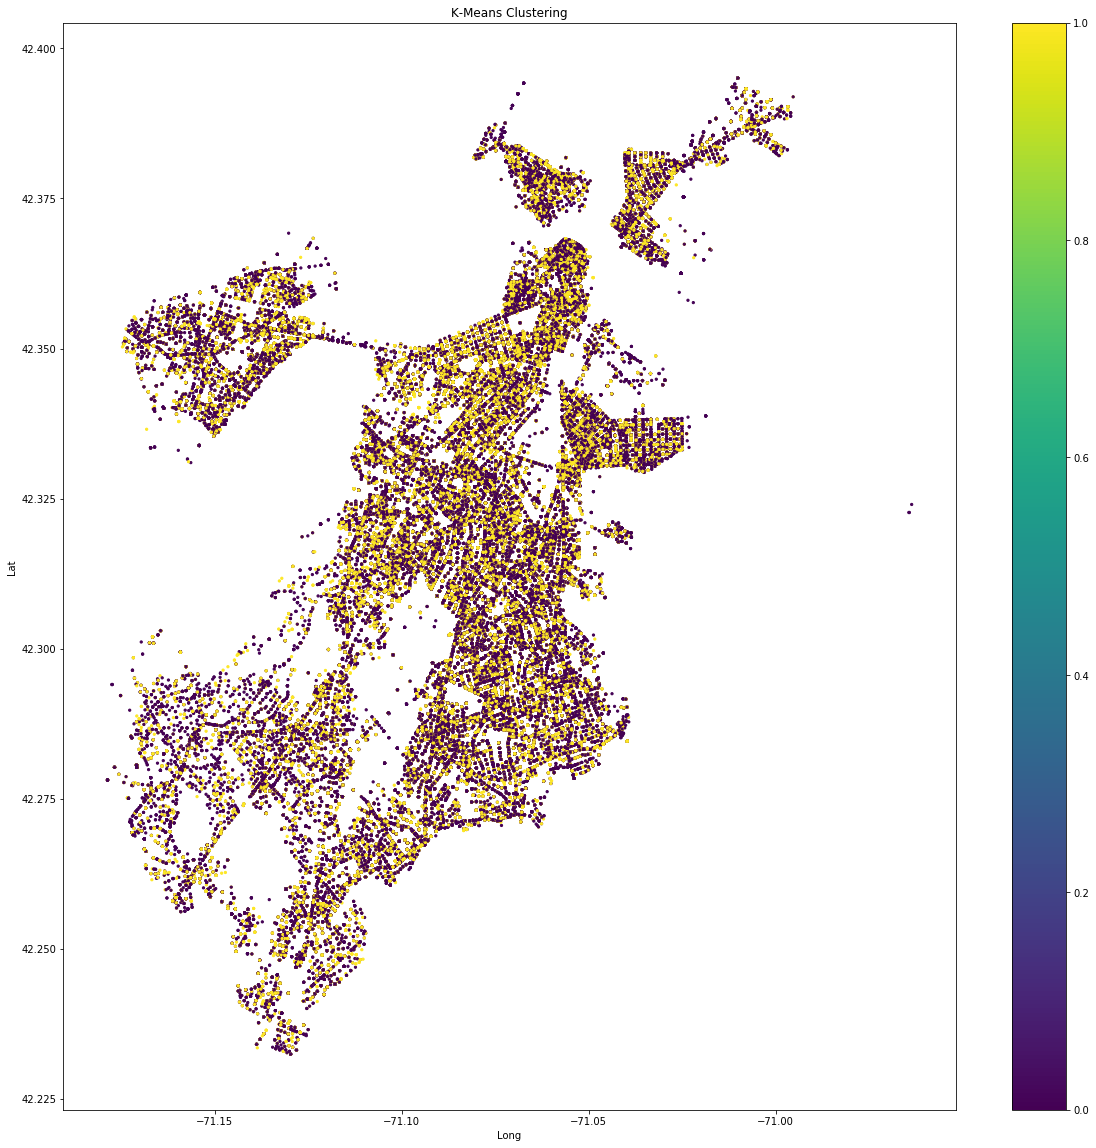

In [463]:
#Plot the clusters obtained using k means
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
scatter = ax.scatter(X['Long'],X['Lat'],
                     c=kmeans[0],s=5)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Long')
ax.set_ylabel('Lat')
plt.colorbar(scatter)

### Interpretation of K-Means Clustering [Offence Code  & Location ]:
<b> From the above figure, we can interpret that there are no two primitive clusters formed these clusters are distributed throughout the map meaning that there is no offense code for particular districts and regions .

## Conclusion:

<b>In Conclusion, we can say that the Boston Crime rate has seen a slight decrease in the year 2018 and Washington Street is the most insecure street in Boston whereas Streets of ADAMS, NEWBURY and CAMBRIDGE are safest.<br><br>
Through visualization we can interpret that Crimes in Boston are at peak in months of June, July, August, and September also crime rate is slightly high on Fridays in a week as well as most of the crimes have occurred in Evening to midnight hours.<br><br>
Modeling of data indicates that there are very fewer chances of predicting the crimes that will occur maybe with large training dataset we will be able to predict it more accurately. Also, by clustering, we have shown the 5 optimum location for safety stations for emergency services can easily reach to provide assistance at the crime scene.

## References

1. Boston Government : https://data.boston.gov/dataset/crime-incident-reports-august-2015-to-date-source-new-system <br>

2. Uniform Crime Reporting : https://www.fbi.gov/services/cjis/ucr

3. kaggle : https://www.kaggle.com/